In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
email_df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
email_df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [4]:
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# Droping unnessessary columns
email_df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
# Rename columns
email_df.rename(columns={'v1':'target','v2':'mails'},inplace=True)

In [7]:
# Checking for duplicated values
email_df.duplicated().sum()

403

In [8]:
# Droping duplicate values
email_df=email_df.drop_duplicates(keep='first')

In [9]:
# Encoding target column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
email_df['target']=label_encoder.fit_transform(email_df['target'])

## 2. EDA

In [10]:
email_df.head()

,target,mails
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
email_df['target'].value_counts()
# Data is imbalanced

target
0    4516
1     653
Name: count, dtype: int64

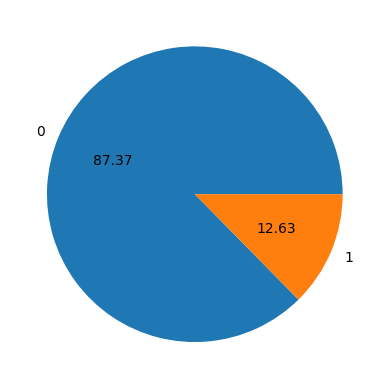

In [12]:
plt.pie(email_df['target'].value_counts(), autopct='%0.2f',labels=email_df['target'].value_counts().index)
plt.show()

In [13]:
import nltk

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
email_df['char_count']=email_df['mails'].apply(len)

In [16]:
email_df['word_count']=email_df['mails'].apply(lambda x: len(nltk.word_tokenize(x)))

In [17]:
email_df['sentence_count']=email_df['mails'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [18]:
email_df.head()

,target,mails,char_count,word_count,sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


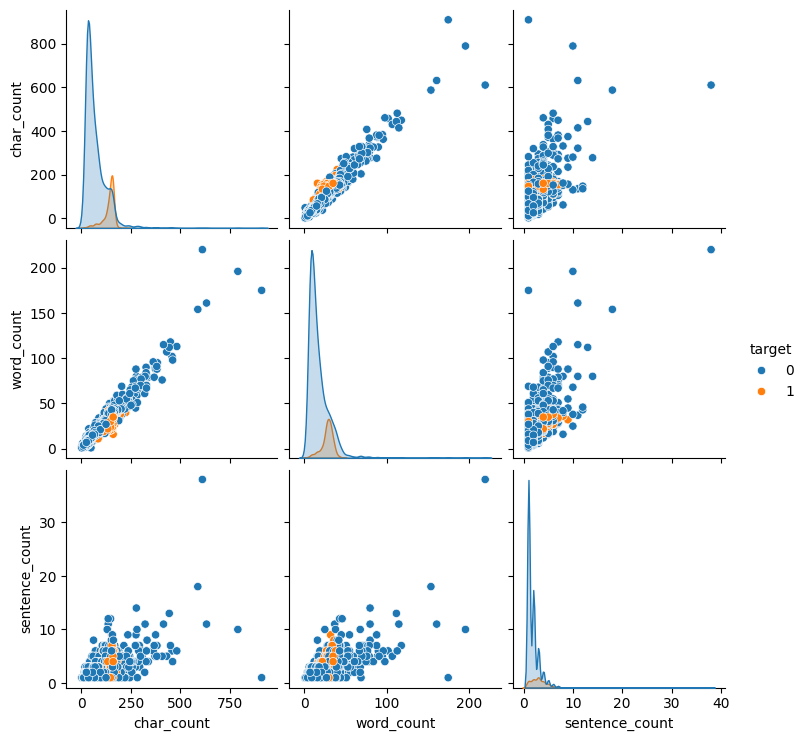

In [19]:
sns.pairplot(email_df,hue='target')

<Axes: >

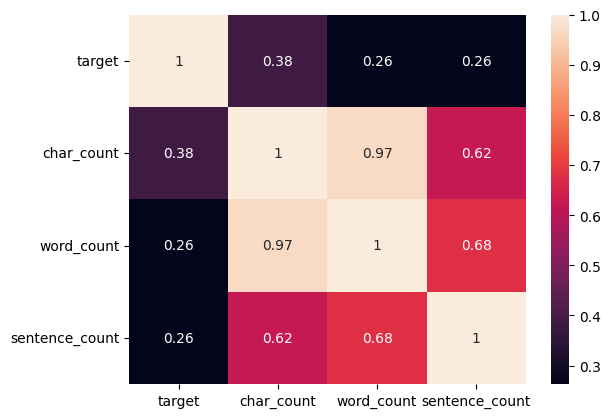

In [20]:
sns.heatmap(email_df[['target','char_count','word_count','sentence_count']].corr(),annot=True)


## Data Processing
- LowerCase
- Tokenisation
- Remove special caracters
- Removing stop words and puncuations
- stemming

In [21]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [22]:
def processing(text):
    
    text=text.lower()  #text converted to lowercase
    text=nltk.word_tokenize(text)  # tokenized text
    
    #Removing special characters
    l=[]
    for word in text:
        if(word.isalnum()):
            l.append(word)
    text=l[:]
    l.clear()
    
    #Removing stop words
    stop_words = stopwords.words('english')  
    for word in text:
        if(word not in stop_words and word not in string.punctuation):
            l.append(word)
    
    # stemming words
    porter_stemmer = PorterStemmer()
    l = [porter_stemmer.stem(word) for word in l]
    
    return " ".join(l)

In [23]:
processing("How about you khushi")

'khushi'

In [24]:
email_df['transformed_text']=email_df['mails'].apply(processing)

In [25]:
from wordcloud import WordCloud
wc=WordCloud(width=800, height=400, background_color='white')
wc.generate(email_df[email_df['target']==1]['transformed_text'].str.cat(sep=' '))
# wc.generate(email_df[email_df['target']==0]['transformed_text'].str.cat(sep=' '))

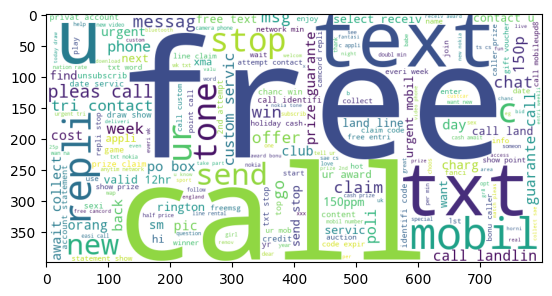

In [26]:
plt.imshow(wc)

In [27]:
spam_corpus=[]
for msg in email_df[email_df['target']==1]['transformed_text'].to_list():
    for word in msg.split():
        spam_corpus.append(word)

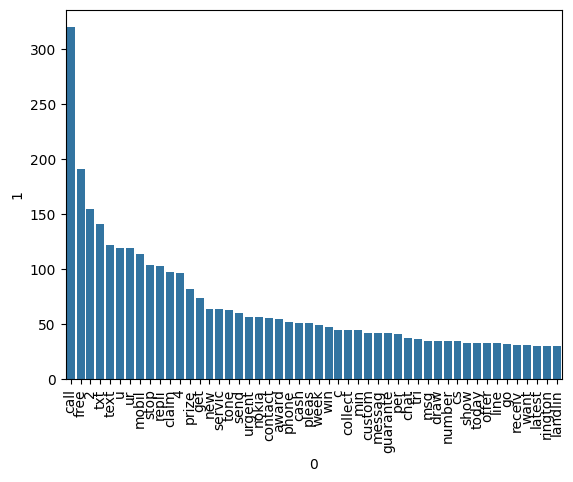

In [28]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(50))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(50))[1])
plt.xticks(rotation='vertical')
plt.show()

In [29]:
ham_corpus=[]
for msg in email_df[email_df['target']==0]['transformed_text'].to_list():
    for word in msg.split():
        ham_corpus.append(word)

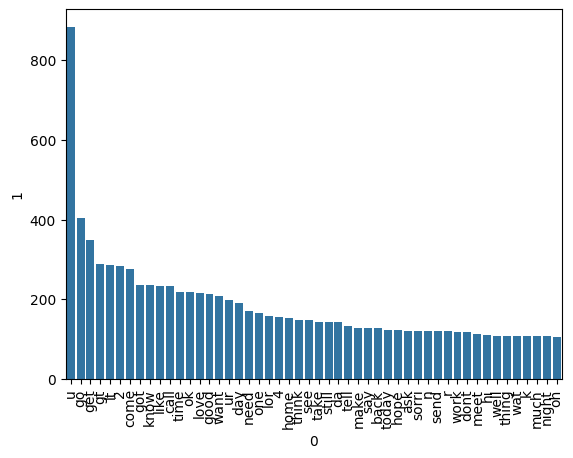

In [30]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(50))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(50))[1])
plt.xticks(rotation='vertical')
plt.show()

## Model Building

In [86]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tf=TfidfVectorizer()
# tf=TfidfVectorizer(max_features=3000)

In [87]:
X=tf.fit_transform(email_df['transformed_text']).toarray()

In [88]:
y=email_df['target'].values

In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [35]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [36]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [68]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [69]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [70]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [40]:
# tfidf --> MultinomialNB

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [53]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
# bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [97]:
# rfc.fit(X_train, y_train)
# t="this"
# t=processing(t)
# a=tf.transform([t])
# rfc.predict(a)[0]

0

In [54]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
#     'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [55]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    
    try:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        return accuracy, precision
    except Exception as e:
        print(f"An error occurred: {e}")

In [71]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)  
    
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [74]:
results=results.merge(pd.DataFrame({'model':clfs.keys(),'accuracy_max3000':accuracy_scores,'precision_max3000':precision_scores}),on='model')

In [75]:
results.sort_values('precision_max3000',ascending=False)

,model,accuracy,precision,accuracy_max3000,precision_max3000
1,KN,0.900387,1.000000,0.905222,1.000000
2,NB,0.959381,1.000000,0.970986,1.000000
5,RF,0.971954,1.000000,0.975822,0.982906
0,SVC,0.972921,0.974138,0.975822,0.974790
7,ETC,0.972921,0.982456,0.974855,0.974576
4,LR,0.951644,0.940000,0.958414,0.970297
6,AdaBoost,0.961315,0.945455,0.960348,0.929204
9,xgb,0.972921,0.943548,0.967118,0.926230
8,GBDT,0.952611,0.923810,0.946809,0.919192
3,DT,0.936170,0.846154,0.929400,0.828283


In [91]:
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(rfc,open('model.pkl','wb'))

In [103]:
email_df[email_df['target']==1]['mails'].head(1)

2    Free entry in 2 a wkly comp to win FA Cup fina...
Name: mails, dtype: object